In [18]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [19]:
#Create Files_Name
image_data=r"C:\Users\SHAN\Desktop\projects\New folder\archive\Faulty_solar_panel"
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,Bird-drop
1,Clean
2,Dusty
3,Electrical-damage
4,Physical-Damage
5,Snow-Covered


In [20]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 885 files belonging to 6 classes.
Using 708 files for training.
Found 885 files belonging to 6 classes.
Using 177 files for validation.


In [21]:
class_names = train.class_names
class_names

['Bird-drop',
 'Clean',
 'Dusty',
 'Electrical-damage',
 'Physical-Damage',
 'Snow-Covered']

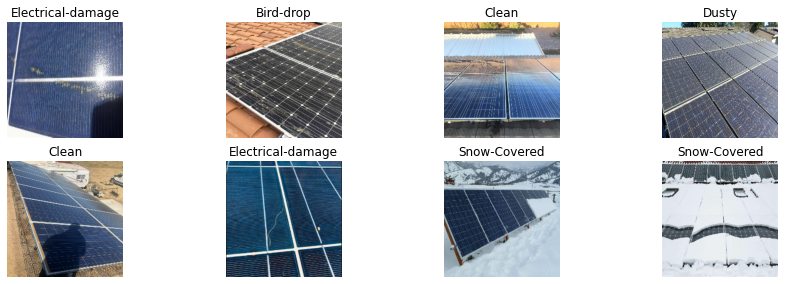

In [22]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [23]:
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten()) 
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(6,activation=tf.nn.softmax))
keras_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobilenetV3small (Functional)   │ ?                      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 939,120 (3.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 939,120 (3.58 MB)

In [24]:
keras_model.build()



In [25]:
checkpoint =ModelCheckpoint("kkeras_model.keras", save_best_only=True)


In [26]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)


In [27]:
keras_model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit(train,epochs=25,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 433ms/step - accuracy: 0.3895 - loss: 3.6861 - val_accuracy: 0.8814 - val_loss: 0.8454
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 358ms/step - accuracy: 0.8992 - loss: 0.4873 - val_accuracy: 0.9661 - val_loss: 0.2922
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 347ms/step - accuracy: 0.9625 - loss: 0.1233 - val_accuracy: 0.9718 - val_loss: 0.2400
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 358ms/step - accuracy: 0.9697 - loss: 0.0931 - val_accuracy: 0.9718 - val_loss: 0.3226
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 358ms/step - accuracy: 0.9825 - loss: 0.0625 - val_accuracy: 0.9718 - val_loss: 0.2791
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 346ms/step - accuracy: 0.9943 - loss: 0.0224 - val_accuracy: 0.9661 - val_loss: 0.2773
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 334ms/step - accuracy: 0.9944 - loss: 0.0297 - val_accuracy: 0.9661 - val_loss: 0.2625
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 342ms/step - accuracy: 0.9893 - loss: 0.0185 - val_accu

In [28]:
hist_=pd.DataFrame(hist.history)
hist_

,accuracy,loss,val_accuracy,val_loss
0,0.498588,3.005037,0.881356,0.845407
1,0.909605,0.399886,0.966102,0.292240
2,0.954802,0.156763,0.971751,0.240034
3,0.975989,0.067666,0.971751,0.322601
4,0.981638,0.056940,0.971751,0.279133
5,0.990113,0.040817,0.966102,0.277329
6,0.992938,0.036696,0.966102,0.262465
7,0.994350,0.010730,0.966102,0.284887


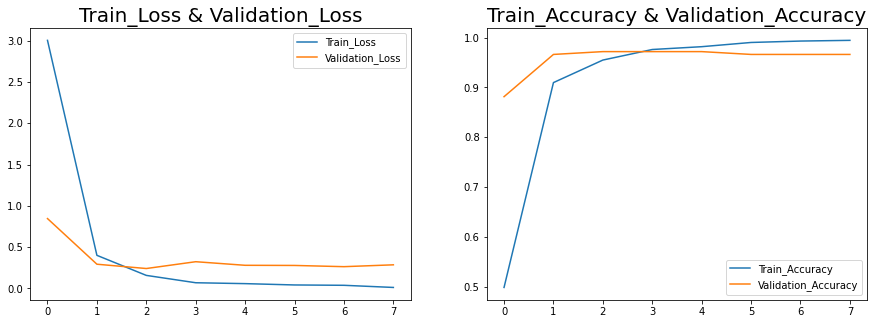

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [30]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 422ms/step


,Actual,Prediction
0,4,3
1,1,1
2,5,5
3,4,4
4,5,3
...,...,...
172,3,3
173,1,1
174,0,0
175,0,0


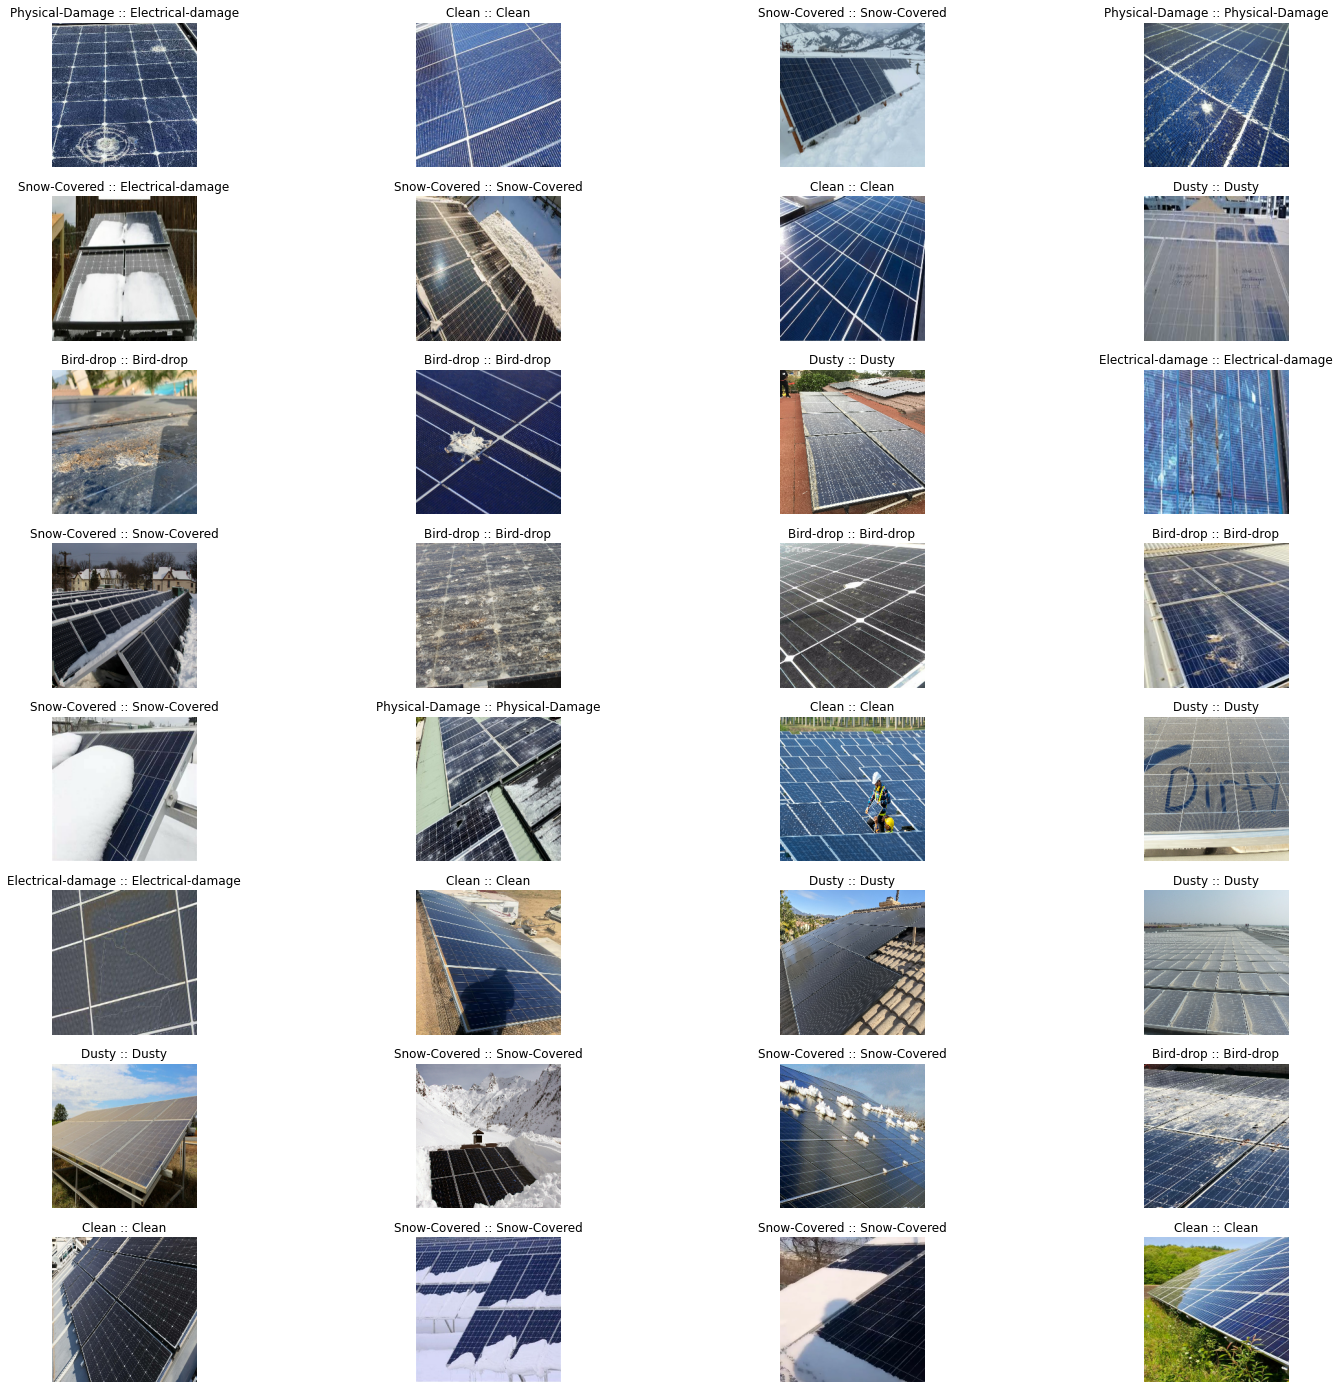

In [31]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

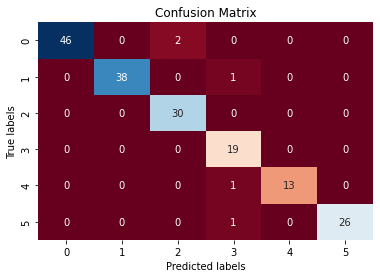

array([[46,  0,  2,  0,  0,  0],
       [ 0, 38,  0,  1,  0,  0],
       [ 0,  0, 30,  0,  0,  0],
       [ 0,  0,  0, 19,  0,  0],
       [ 0,  0,  0,  1, 13,  0],
       [ 0,  0,  0,  1,  0, 26]], dtype=int64)

In [32]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()
CM

In [33]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))

accuracy is: 97.175%


In [34]:
import time
import cv2
import numpy as np
import tkinter as tk
from tkinter import filedialog


checkpoint = tf.keras.callbacks.ModelCheckpoint("kkeras_model.keras", save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)


keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


root = tk.Tk()
root.withdraw()  

file_path = filedialog.askopenfilename(title="Select MP4 File", filetypes=[("MP4 files", "*.mp4")])

if file_path:
    cap = cv2.VideoCapture(file_path)

    output_path = r"C:\Users\SHAN\Desktop\output.mp4"
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), cap.get(cv2.CAP_PROP_FPS), (frame_width,frame_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        processed_frame = cv2.resize(frame, (224, 224))
        
        prediction = keras_model.predict(np.expand_dims(processed_frame, axis=0))
        predicted_class = np.argmax(prediction)
        predicted_label = class_names[predicted_class]
        
        cv2.putText(frame, predicted_label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        
        out.write(frame)

    cap.release()
    out.release()
    cv2.destroyAllWindows()
else:
    print("No file selected.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━